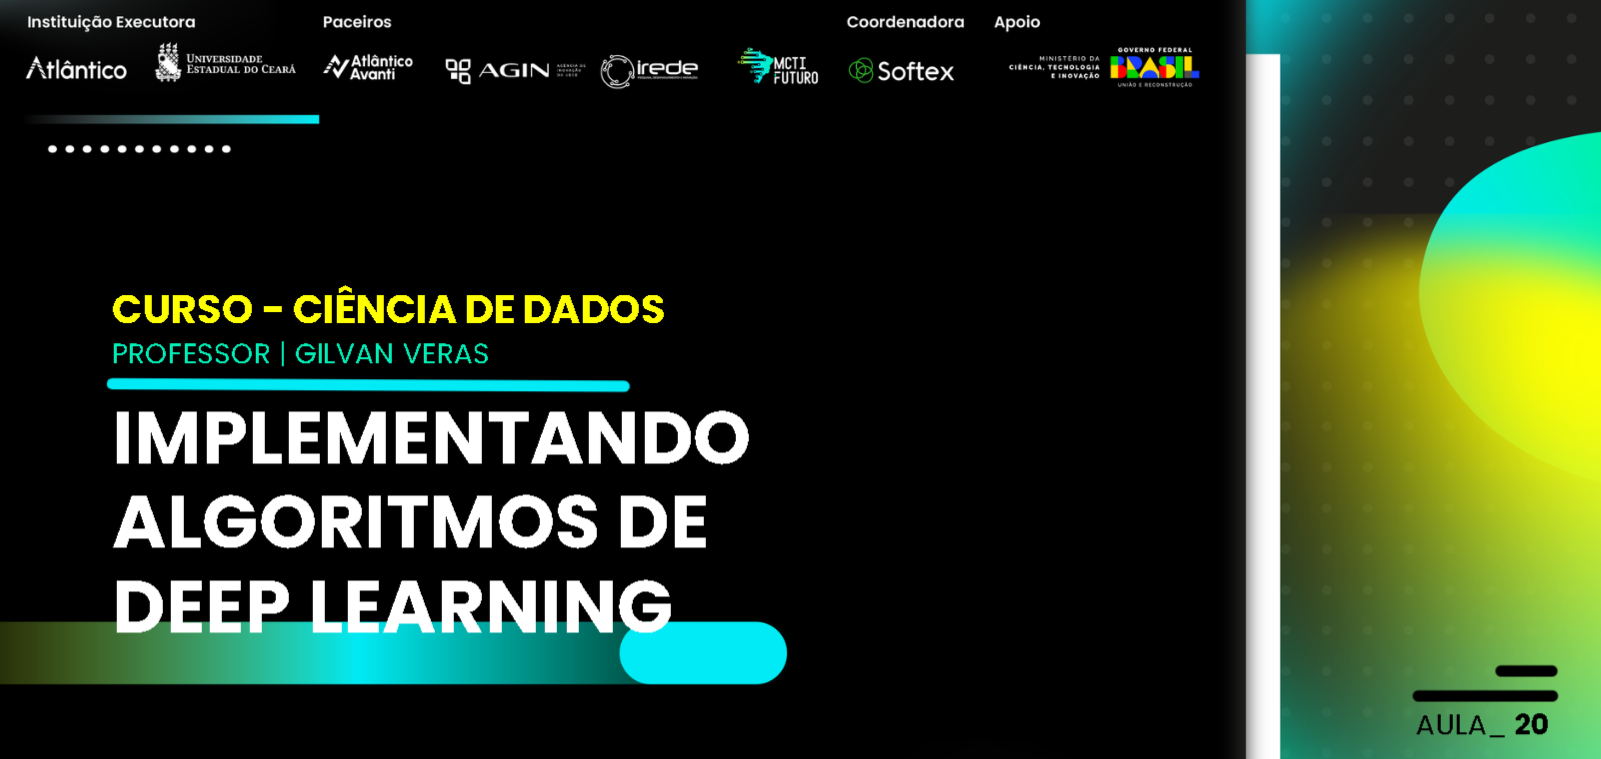

Para essa aula prática, vamos construir um sistema de classificação de imagens usando Python e Jupyter Notebook, aplicando Redes Neurais Convolucionais (CNNs) para processar imagens e Redes Neurais Recorrentes (RNNs) para modelar sequências de características extraídas das imagens.

O objetivo principal é:

- Carregar e pré-processar um dataset de imagens real, usando o conjunto de dados CIFAR-10.
- Criar um modelo de CNN para extração de características.
- Criar um modelo de RNN para interpretar sequências dessas características.
- Treinar e avaliar o modelo.
- Testar a rede com novas imagens.

#### 0 -  Importação das Bibliotecas

In [ ]:
import numpy as np  # Biblioteca para manipulação de arrays e cálculos numéricos
import tensorflow as tf  # Framework de aprendizado de máquina e deep learning
from tensorflow.keras.models import Sequential  # Classe para criar modelos sequenciais
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, TimeDistributed  # Camadas usadas na CNN e RNN
from tensorflow.keras.datasets import cifar10  # Dataset CIFAR-10 para treinamento e teste
from tensorflow.keras.utils import to_categorical  # Função para converter rótulos em one-hot encoding
import matplotlib.pyplot as plt  # Biblioteca para visualização de gráficos

### 1 -  Dataset de exemplo

O CIFAR-10 (Canadian Institute for Advanced Research - 10 classes) é um dos conjuntos de dados mais usados em aprendizado de máquina para tarefas de classificação de imagens. Ele contém pequenas imagens coloridas, tornando-o um excelente ponto de partida para modelos de Redes Neurais Convolucionais (CNNs) e outras arquiteturas de deep learning.

1. Visão Geral do Dataset

    **O CIFAR-10 contém:**

- 60.000 imagens coloridas no formato 32×32 pixels.
- 10 classes de objetos, representando categorias do mundo real.
- As imagens são distribuídas de forma balanceada entre as classes.
- Os dados já estão separados em conjuntos de treino e teste:

  -- 50.000 imagens para treino.
  -- 10.000 imagens para teste.

2. Formato das imagens

- Cada imagem tem:

    - Altura: 32 pixels
    - Largura: 32 pixels
    - Canais de cor (RGB): 3 (Vermelho, Verde e Azul)

Isso significa que cada imagem tem uma forma (32, 32, 3).

3. As classes do CIFAR-10

O dataset contém 10 categorias, que representam diferentes objetos do mundo real. Abaixo estão as classes e exemplos do que elas representam:

| **Índice** | **Classe**     | **Descrição**                      |
|------------|--------------|--------------------------------|
| 0          | **Airplane**  | Avião, aeronave               |
| 1          | **Automobile**| Carros e veículos terrestres (exceto caminhões) |
| 2          | **Bird**      | Pássaros                      |
| 3          | **Cat**       | Gatos                         |
| 4          | **Deer**      | Cervos                        |
| 5          | **Dog**       | Cães                           |
| 6          | **Frog**      | Sapos e rãs                   |
| 7          | **Horse**     | Cavalos                        |
| 8          | **Ship**      | Navios e barcos                |
| 9          | **Truck**     | Caminhões (sem carros pequenos incluídos) |


Cada imagem do dataset está rotulada com um número de 0 a 9, correspondendo a uma dessas classes.

4. Estrutura dos dados

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

- x_train: contém as 50.000 imagens de treino no formato (50000, 32, 32, 3).
- y_train: contém os rótulos correspondentes de cada imagem no formato (50000, 1).
- x_test: contém as 10.000 imagens de teste no formato (10000, 32, 32, 3).
- y_test: contém os rótulos das imagens de teste no formato (10000, 1).

Exemplo de uma imagem individual: Se pegarmos uma única imagem, ela terá a seguinte estrutura:

In [ ]:
print(x_train[0].shape)  

Isso confirma que a imagem tem 32 pixels de largura, 32 pixels de altura e 3 canais de cor (RGB).

In [ ]:
# Lista dos nomes das classes
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Selecionar 10 imagens aleatórias
num_images = 10
random_indices = np.random.choice(len(x_train), num_images, replace=False)
selected_images = x_train[random_indices]
selected_labels = y_train[random_indices]

# Criar a figura
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i+1)  # Criar um grid 2x5 para exibir as imagens
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(selected_images[i])
    plt.xlabel(class_names[selected_labels[i][0]])  # Nome da classe correspondente

# Mostrar as imagens
plt.show()

O CIFAR-10 é um excelente dataset para aprendizado por vários motivos:

✅ Tamanho adequado: Não é tão grande que dificulte o treinamento, mas também não é pequeno demais.

✅ Desafio moderado: As imagens são complexas o suficiente para exigir modelos neurais robustos.

✅ Equilíbrio de classes: Todas as classes possuem a mesma quantidade de amostras, evitando viés.

✅ Facilidade de uso: Está integrado ao TensorFlow, permitindo fácil carregamento e manipulação.

#### 2 -  Normalizar os dados

Normalizamos as imagens para que os valores dos pixels fiquem entre 0 e 1.

In [ ]:
# Normalizar os pixels das imagens para valores entre 0 e 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#### 3 -  Categorização/Padronização

Convertendo os rótulos em one-hot encoding para serem usados na rede neural.

In [ ]:
# Converter os rótulos em one-hot encoding
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

#### 4 - Construir função do carregamento dos dados (Modularização):

In [ ]:
# 1. Carregar e preparar os dados
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    
    # Normalizar os pixels das imagens para valores entre 0 e 1
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    # Converter os rótulos em one-hot encoding
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
    
    return x_train, y_train, x_test, y_test

### 5. Criar a CNN para extração de características

In [ ]:
def create_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),  # Primeira camada convolucional
        MaxPooling2D((2, 2)),  # Redução de dimensionalidade
        Conv2D(64, (3, 3), activation='relu', padding='same'),  # Segunda camada convolucional
        MaxPooling2D((2, 2)),  # Redução de dimensionalidade
        Conv2D(128, (3, 3), activation='relu', padding='same'),  # Terceira camada convolucional
        MaxPooling2D((2, 2)),  # Redução de dimensionalidade
        Flatten(),  # Achatar os dados para camada totalmente conectada
        Dense(128, activation='relu'),  # Camada totalmente conectada com 128 neurônios
        Dropout(0.5)  # Regularização para evitar overfitting
    ])
    return model

A função create_cnn() define uma Rede Neural Convolucional (CNN) para extrair características das imagens do dataset CIFAR-10. Vamos analisar cada camada e seus parâmetros.

#### Conv2D – Camadas Convolucionais

In [ ]:
Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))

- O que faz?

Aplica 32 filtros convolucionais, cada um com tamanho 3×3, à imagem de entrada.

Usa a função de ativação ReLU (Rectified Linear Unit) para introduzir não-linearidade, ajudando na aprendizagem de padrões mais complexos.

O padding='same' mantém o tamanho da imagem de saída igual ao da entrada.

O input_shape=(32, 32, 3) define que a entrada da rede são imagens de 32x32 pixels com 3 canais de cor (RGB).

- Motivo dessa configuração:

Tamanho do kernel (3x3): Pequeno o suficiente para capturar detalhes, mas grande o bastante para entender padrões locais.

Número de filtros (32): Uma quantidade moderada para capturar várias características iniciais sem sobrecarregar a rede.

ReLU: Evita problemas de saturação de gradiente (vanishing gradient).


#### MaxPooling2D – Camadas de Pooling

In [ ]:
MaxPooling2D((2, 2))

- O que faz?

Aplica max pooling com uma janela de 2x2, reduzindo a dimensionalidade espacial da imagem pela metade.

Apenas o valor máximo da região 2x2 é mantido.

- Motivo dessa configuração:

Reduz o número de parâmetros e o custo computacional.

Ajuda a capturar características mais robustas, removendo variações pequenas.

Evita overfitting, pois a rede se concentra em padrões mais globais em vez de detalhes específicos.

#### Segunda e terceira camadas convolucionais

In [ ]:
Conv2D(64, (3, 3), activation='relu', padding='same')
MaxPooling2D((2, 2))
Conv2D(128, (3, 3), activation='relu', padding='same')
MaxPooling2D((2, 2))

- O que fazem?

Aumentam o número de filtros para 64 e depois 128, permitindo detectar padrões cada vez mais complexos.

Cada camada convolucional extrai características mais abstratas, enquanto as camadas de MaxPooling reduzem a dimensionalidade.

- Motivo dessa configuração:

Aumento progressivo dos filtros (de 32 → 64 → 128) melhora a capacidade da rede de aprender características mais detalhadas.

Camadas mais profundas capturam padrões complexos, como bordas, texturas e formas.

#### Flatten – Transformação para camada densa

In [ ]:
Flatten()

- O que faz?

Converte a saída 3D da CNN em um vetor unidimensional, necessário para alimentar camadas totalmente conectadas (Dense).

- Motivo dessa configuração:

A CNN extrai features espaciais, mas para classificar as imagens, precisamos de uma camada densa que processe essas informações.

#### Dense – Camada Totalmente Conectada

In [ ]:
Dense(128, activation='relu')

- O que faz?

Camada densa com 128 neurônios, ativada por ReLU.

Ajuda a aprender combinações mais abstratas das características extraídas pela CNN.

- Motivo dessa configuração:

O número 128 é um bom compromisso entre expressividade e eficiência.

Mais neurônios aumentam a capacidade da rede, mas também o risco de overfitting.

#### Dropout – Regularização

In [ ]:
Dropout(0.5)

- O que faz?

Durante o treinamento, desativa aleatoriamente 50% dos neurônios para evitar overfitting.

- Motivo dessa configuração:

Evita que a rede memorize o conjunto de treino, melhorando a generalização.
0.5 é um valor padrão eficaz, removendo metade das conexões sem comprometer a aprendizagem.

##  Resumo da Arquitetura

| **Camada**       | **Parâmetros**                          | **Função**                          |
|------------------|----------------------------------------|-------------------------------------|
| **Conv2D**       | 32 filtros, (3,3), ReLU, same padding | Extrai características iniciais     |
| **MaxPooling2D** | (2,2)                                  | Reduz dimensionalidade              |
| **Conv2D**       | 64 filtros, (3,3), ReLU, same padding | Aprimora padrões capturados         |
| **MaxPooling2D** | (2,2)                                  | Reduz dimensionalidade              |
| **Conv2D**       | 128 filtros, (3,3), ReLU, same padding | Extrai características complexas    |
| **MaxPooling2D** | (2,2)                                  | Reduz dimensionalidade              |
| **Flatten**      | -                                      | Converte feature maps em vetor      |
| **Dense**        | 128 neurônios, ReLU                    | Aprende padrões abstratos           |
| **Dropout**      | 50%                                    | Previne overfitting                 |


----

### 6. Criar a RNN para processar as características extraídas

In [ ]:
def create_rnn():
    model = Sequential([
        # Camada distribuída no tempo para processar características
        TimeDistributed(Dense(64, activation='relu'), input_shape=(1, 128)),  
        LSTM(64, return_sequences=False),  # Camada LSTM para capturar dependências temporais
        Dense(10, activation='softmax')  # Camada de saída para classificação das 10 classes
    ])
    return model

A função create_rnn() define uma Rede Neural Recorrente (RNN) usando Long Short-Term Memory (LSTM) para processar sequências de características extraídas anteriormente pela CNN. Essa arquitetura permite que a rede aprenda padrões temporais nos dados de entrada.

#### Definição do Modelo Sequencial

In [ ]:
model = Sequential([])

- O que faz?

Cria um modelo sequencial, onde as camadas são empilhadas uma após a outra.

Esse modelo é apropriado para arquiteturas simples, onde cada camada recebe a saída da camada anterior.

- Motivo:

Fácil de construir e interpretar.

Permite adicionar camadas de forma ordenada.

#### Camada TimeDistributed(Dense(64, activation='relu'))

In [ ]:
TimeDistributed(Dense(64, activation='relu'), input_shape=(1, 128))

- O que faz?

Aplica uma camada densa (totalmente conectada) independentemente em cada passo da sequência temporal.

O parâmetro input_shape=(1, 128) significa que cada entrada possui 1 time step e 128 características (provenientes da CNN).

A ativação ReLU (Rectified Linear Unit) adiciona não-linearidade para ajudar no aprendizado de padrões mais complexos.

- Motivo:

Permite que cada frame de tempo passe por uma camada densa antes de ser processado pela LSTM.

Facilita a transição de dados extraídos pela CNN para serem interpretados sequencialmente.


####  Camada LSTM

In [ ]:
LSTM(64, return_sequences=False)

- O que faz?

Camada LSTM (Long Short-Term Memory), um tipo avançado de RNN que pode aprender dependências de longo prazo.

Possui 64 unidades ocultas, ou seja, 64 células de memória, cada uma aprendendo uma representação abstrata da entrada.

return_sequences=False indica que somente a última saída da LSTM será enviada para a próxima camada.

- Motivo:

LSTMs são ótimas para capturar dependências temporais.

O parâmetro return_sequences=False é usado porque estamos interessados apenas no estado final, que será enviado para a camada de saída.

#### Camada de Saída (Dense)

In [ ]:
Dense(10, activation='softmax')  

- O que faz?

Camada totalmente conectada (Dense) com 10 neurônios, correspondente ao número de classes no CIFAR-10.

Usa Softmax, uma função de ativação que transforma os valores em probabilidades para cada classe.

- Motivo:

Número de neurônios = número de classes (10).

Softmax permite que a rede produza probabilidades para cada classe, facilitando a interpretação dos resultados.

## 📌 Resumo da Arquitetura

| **Camada**         | **Parâmetros**                           | **Função**                         |
|--------------------|-----------------------------------------|------------------------------------|
| **TimeDistributed** | Dense(64, ReLU), input_shape=(1, 128)  | Processa as características extraídas |
| **LSTM**          | 64 células de memória, return_sequences=False | Captura dependências temporais |
| **Dense**         | 10 neurônios, Softmax                    | Classificação das imagens        |


Esta arquitetura permite que a rede: 

- Converta características extraídas pela CNN em sequências.
- Aprenda padrões temporais usando LSTM.
- Produza probabilidades para cada classe do CIFAR-10.

Essa abordagem é útil para problemas que exigem interpretação de sequências, como reconhecimento de gestos ou análise de vídeos.

---

### 7. Construir o modelo completo combinando CNN e RNN

In [ ]:
def build_combined_model():
    # Criar a CNN
    cnn = create_cnn()
    cnn_input = tf.keras.Input(shape=(32, 32, 3))  # Definir a entrada da CNN
    cnn_output = cnn(cnn_input)  # Chamar a CNN para definir a saída corretamente

    # Adaptar a saída da CNN para entrada da RNN
    reshaped_output = tf.keras.layers.Reshape((1, 128))(cnn_output)  

    # Criar a RNN
    rnn = create_rnn()
    rnn_output = rnn(reshaped_output)  # Chamar a RNN

    # Construir o modelo final conectando CNN e RNN
    model = tf.keras.Model(inputs=cnn_input, outputs=rnn_output)
    
    # Compilar o modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
    
    return model


Essa função constrói um modelo híbrido combinando Redes Neurais Convolucionais (CNNs) e Redes Neurais Recorrentes (RNNs - LSTMs) para classificar imagens do dataset CIFAR-10. A CNN extrai características espaciais das imagens, enquanto a RNN aprende relações temporais entre essas características.

#### Criar a CNN para extração de características

In [ ]:
cnn = create_cnn()
cnn_input = tf.keras.Input(shape=(32, 32, 3))  # Nova entrada personalizada
cnn_output = cnn(cnn_input)

- O que faz?

Chama a função create_cnn(), que define a Rede Neural Convolucional (CNN) para processar as imagens.

cnn.output obtém a saída da CNN, que contém um vetor de 128 características extraídas das imagens de entrada.

- Motivo dessa escolha

CNNs são ideais para análise de imagens, pois capturam padrões locais (bordas, texturas, formas).

O resultado é um vetor numérico representando cada imagem, pronto para ser processado pela RNN.


 #### Adaptar a saída da CNN para a entrada da RNN

In [ ]:
reshaped_output = tf.keras.layers.Reshape((1, 128))(cnn_output)  # Adaptar para entrada da RNN

- O que faz?

A CNN gera um vetor (128, ), mas a LSTM espera uma sequência temporal (formato (timesteps, features)).

Reshape((1, 128)) transforma o vetor em uma sequência com 1 time step e 128 características.

- Motivo dessa escolha

Esse formato permite que a LSTM veja a saída da CNN como uma sequência temporal.

Essa técnica é útil em análises sequenciais, como vídeos, séries temporais ou reconhecimento de padrões complexos.


#### Criar a RNN para processar a sequência

In [ ]:
rnn = create_rnn()
final_output = rnn(reshaped_output)

- O que faz?

create_rnn() cria a Rede Neural Recorrente (RNN) com LSTM.

A RNN recebe reshaped_output (sequência de tamanho 1 e 128 características).

A LSTM processa essa entrada e gera um vetor de 10 probabilidades (uma para cada classe do CIFAR-10).

- Motivo dessa escolha

LSTMs são poderosas para aprender padrões temporais, então podem ajudar na classificação ao interpretar a sequência de características 
extraídas pela CNN.

Essa abordagem permite combinar representações espaciais e temporais na classificação.

#### Criar e compilar o modelo final

In [ ]:
model = tf.keras.Model(inputs=cnn.input, outputs=final_output)

- O que faz?

Define o modelo final com entrada na CNN e saída na RNN.

A CNN processa a imagem e a RNN classifica os padrões aprendidos.

#### Compilar o modelo

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compilação do modelo

- O que faz?

optimizer='adam' → Usa Adam, um otimizador eficiente para deep learning.

loss='categorical_crossentropy' → Como temos 10 classes, usamos a entropia cruzada categórica.

metrics=['accuracy'] → Avaliamos o modelo com acurácia.

- Motivo dessa escolha

Adam ajusta automaticamente a taxa de aprendizado, acelerando a convergência.

Entropia cruzada é a melhor função de perda para classificação multiclasse.

Acurácia é a métrica padrão para avaliar modelos de classificação.

###  Resumo da Arquitetura

| **Etapa**            | **Ação**                                      | **Motivo**                                    |
|----------------------|--------------------------------|--------------------------------|
| **Criar CNN**       | Extrai características das imagens | Captura padrões visuais       |
| **Adaptar saída**   | Transforma vetor CNN para sequência | Permite entrada compatível com LSTM |
| **Criar RNN**       | Aprende dependências na sequência | Combina padrões espaciais e temporais |
| **Criar modelo final** | Conecta CNN e RNN | Permite fluxo de dados contínuo |
| **Compilar modelo** | Define otimizador e função de perda | Melhora eficiência e desempenho |
| **Retornar modelo** | Entrega modelo pronto para treino | Permite treinamento imediato |



Essa abordagem combina CNN + RNN para melhorar a classificação de imagens, explorando: 

- CNN para aprender padrões espaciais (bordas, formas, texturas).

- LSTM para aprender padrões temporais (combinações de características).

- Treinamento eficiente com Adam e entropia cruzada.

---

### 8. Treinar e avaliar o modelo

In [ ]:
def train_and_evaluate():
    x_train, y_train, x_test, y_test = load_data()
    model = build_combined_model()
    
    print(model.summary())  # Exibir a estrutura do modelo
    
    history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))  # Treinamento
    
    # Avaliação do modelo
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'Test accuracy: {test_acc:.4f}')
    
    return model, history

Essa função realiza três tarefas principais:

- Carregar os dados do CIFAR-10.
- Construir e treinar o modelo híbrido (CNN + RNN).
- Avaliar a performance do modelo treinado

#### Carregar os dados

In [ ]:
x_train, y_train, x_test, y_test = load_data()

- O que faz?

Chama a função load_data(), que carrega o dataset CIFAR-10 e retorna:

- x_train: Imagens de treinamento (50.000 imagens de 32×32×3).
- y_train: Rótulos das imagens de treinamento (codificados em one-hot encoding).
- x_test: Imagens de teste (10.000 imagens de 32×32×3).
- y_test: Rótulos das imagens de teste.

- Motivo dessa escolha

CIFAR-10 é um dataset balanceado, ideal para testes com CNNs e RNNs.

A separação em treino e teste previne overfitting, garantindo que o modelo seja avaliado corretamente.


#### Construir o modelo híbrido (CNN + RNN)

In [ ]:
model = build_combined_model()

- O que faz?

Chama build_combined_model(), que combina CNN e RNN para classificar imagens.

Retorna o modelo já compilado e pronto para treinamento.

- Motivo dessa escolha

A CNN extrai características espaciais (bordas, texturas, formas).

A RNN interpreta sequências de características para melhorar a classificação.

Esse modelo pode aprender padrões mais complexos do que uma CNN tradicional.


#### Exibir a estrutura do modelo

In [ ]:
print(model.summary())

- O que faz?

Imprime um resumo da arquitetura do modelo, mostrando:

O número de camadas.

O número de parâmetros treináveis.

A estrutura de entrada e saída.

- Motivo dessa escolha

Permite validar se a CNN e a RNN foram corretamente empilhadas.

Ajuda a identificar erros de forma na arquitetura antes do treinamento.

#### Treinar o modelo

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

- O que faz?

Treina o modelo com os dados de treinamento (x_train, y_train).

Executa o treinamento por 10 épocas.

Usa um batch size de 64 (atualiza os pesos a cada 64 imagens).

Separa dados de validação (x_test, y_test) para medir a performance durante o treino.

- Motivo das escolhas


| **Parâmetro**                 | **Motivo** |
|-------------------------------|-----------|
| `epochs=10`                   | Equilíbrio entre treino e tempo de execução. Modelos mais complexos precisam de mais épocas. |
| `batch_size=64`               | Usado para melhorar eficiência no processamento da GPU. Pequenos batches treinam mais rápido. |
| `validation_data=(x_test, y_test)` | Ajuda a monitorar o desempenho do modelo durante o treinamento e evitar overfitting. |


#### Avaliar o modelo

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

- O que faz?

Calcula a acurácia final e a função de perda no conjunto de teste.

verbose=2 controla o nível de detalhes da saída (1 exibe progresso detalhado, 2 exibe apenas resultados finais).

- Motivo dessa escolha

Avaliar o modelo em dados nunca vistos garante que ele não está simplesmente memorizando o conjunto de treinamento.

O uso de evaluate() garante uma medição objetiva da performance.

----

Essa função realiza todo o pipeline de machine learning, desde carregar os dados até avaliar a performance do modelo treinado.

- Treinamento eficiente com Adam e batch size otimizado
- Avaliação usando um conjunto de teste para medir generalização
- Retorno do histórico para análise de aprendizado

Com essa abordagem, podemos ajustar hiperparâmetros, visualizar curvas de aprendizado e otimizar o modelo!

---

### 9. Executar o treinamento

In [ ]:
model, history = train_and_evaluate()

---

### 10. Visualizar a curva de aprendizado

In [ ]:
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'], label='Acurácia no Treino')
    plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

plot_learning_curve(history)

---

Agora que treinamos e avaliamos nosso modelo, podemos testá-lo com imagens novas que não pertencem ao conjunto CIFAR-10.

Abaixo estão dois métodos para testar o modelo:

1) Usando imagens do conjunto de teste do CIFAR-10 (para verificar previsões em dados conhecidos).

2) Carregando imagens externas (imagens próprias)

### 1)Testando com imagens do CIFAR-10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de classes do CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
               "Dog", "Frog", "Horse", "Ship", "Truck"]

def test_on_cifar10(model, x_test, y_test, num_samples=5):
    """
    Testa o modelo em 'num_samples' imagens aleatórias do conjunto de teste CIFAR-10.
    """
    indices = np.random.choice(len(x_test), num_samples, replace=False)
    selected_images = x_test[indices]
    selected_labels = np.argmax(y_test[indices], axis=1)

    predictions = np.argmax(model.predict(selected_images), axis=1)

    # Exibir imagens e previsões
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(selected_images[i])
        plt.xlabel(f"Real: {class_names[selected_labels[i]]}\nPred: {class_names[predictions[i]]}")
    
    plt.show()

x_train, y_train, x_test, y_test = load_data()
# Testar o modelo treinado no conjunto de teste
test_on_cifar10(model, x_test, y_test, num_samples= 6)


- Selecionamos num_samples imagens aleatórias do conjunto de teste.

- O modelo faz previsões e compararmos com os rótulos reais.

- As imagens são exibidas com os rótulos reais e previstos.

---

In [ ]:
#pip install opencv-python